In [4]:
import mujoco
import numpy as np
import mediapy as media
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True, linewidth=100)

In [2]:
x_pos = -1. # x position of the cheetah
floor_z_pos = -0.5 # z position of the floor
xml = f"""
<mujoco model="cheetah">
  <compiler angle="radian" coordinate="local" inertiafromgeom="true" settotalmass="14"/>
  <default>
    <joint armature=".1" damping=".01" limited="true" solimplimit="0 .8 .03" solreflimit=".02 1" stiffness="8"/>
    <geom conaffinity="0" condim="3" contype="1" friction=".4 .1 .1" rgba="0.8 0.6 .4 1" solimp="0.0 0.8 0.01" solref="0.02 1"/>
    <motor ctrllimited="true" ctrlrange="-1 1"/>
  </default>
  <size nstack="300000" nuser_geom="1"/>
  <option gravity="0 0 -9.81" timestep="0.01"/>
  <asset>
    <texture builtin="gradient" height="100" rgb1="1 1 1" rgb2="0 0 0" type="skybox" width="100"/>
    <texture builtin="flat" height="1278" mark="cross" markrgb="1 1 1" name="texgeom" random="0.01" rgb1="0.8 0.6 0.4" rgb2="0.8 0.6 0.4" type="cube" width="127"/>
    <texture builtin="checker" height="100" name="texplane" rgb1="0 0 0" rgb2="0.8 0.8 0.8" type="2d" width="100"/>
    <material name="MatPlane" reflectance="0.5" shininess="1" specular="1" texrepeat="60 60" texture="texplane"/>
    <material name="geom" texture="texgeom" texuniform="true"/>
  </asset>
  <worldbody>
    <light cutoff="100" diffuse="1 1 1" dir="-0 0 -1.3" directional="true" exponent="1" pos="0 0 1.3" specular=".1 .1 .1"/>
    <geom conaffinity="1" condim="3" material="MatPlane" name="floor" pos="0 0 {floor_z_pos}" rgba="0.8 0.9 0.8 1" size="15 15 15" type="plane"/>
    <body name="torso" pos="{x_pos} 0 .7">
      <camera name="track" mode="trackcom" pos="0 -3 0.3" xyaxes="1 0 0 0 0 1"/>
      <joint armature="0" axis="1 0 0" damping="0" limited="false" name="rootx" pos="0 0 0" stiffness="0" type="slide"/>
      <joint armature="0" axis="0 0 1" damping="0" limited="false" name="rootz" pos="0 0 0" stiffness="0" type="slide"/>
      <joint armature="0" axis="0 1 0" damping="0" limited="false" name="rooty" pos="0 0 0" stiffness="0" type="hinge"/>
      <geom fromto="-.5 0 0 .5 0 0" name="torso" size="0.046" type="capsule"/>
      <geom axisangle="0 1 0 .87" name="head" pos=".6 0 .1" size="0.046 .15" type="capsule"/>
      <!-- <site name='tip'  pos='.15 0 .11'/>-->
      <body name="bthigh" pos="-.5 0 0">
        <joint axis="0 1 0" damping="6" name="bthigh" pos="0 0 0" range="-.52 1.05" stiffness="240" type="hinge"/>
        <geom axisangle="0 1 0 -3.8" name="bthigh" pos=".1 0 -.13" size="0.046 .145" type="capsule"/>
        <body name="bshin" pos=".16 0 -.25">
          <joint axis="0 1 0" damping="4.5" name="bshin" pos="0 0 0" range="-.785 .785" stiffness="180" type="hinge"/>
          <geom axisangle="0 1 0 -2.03" name="bshin" pos="-.14 0 -.07" rgba="0.9 0.6 0.6 1" size="0.046 .15" type="capsule"/>
          <body name="bfoot" pos="-.28 0 -.14">
            <joint axis="0 1 0" damping="3" name="bfoot" pos="0 0 0" range="-.4 .785" stiffness="120" type="hinge"/>
            <geom axisangle="0 1 0 -.27" name="bfoot" pos=".03 0 -.097" rgba="0.9 0.6 0.6 1" size="0.046 .094" type="capsule"/>
          </body>
        </body>
      </body>
      <body name="fthigh" pos=".5 0 0">
        <joint axis="0 1 0" damping="4.5" name="fthigh" pos="0 0 0" range="-1 .7" stiffness="180" type="hinge"/>
        <geom axisangle="0 1 0 .52" name="fthigh" pos="-.07 0 -.12" size="0.046 .133" type="capsule"/>
        <body name="fshin" pos="-.14 0 -.24">
          <joint axis="0 1 0" damping="3" name="fshin" pos="0 0 0" range="-1.2 .87" stiffness="120" type="hinge"/>
          <geom axisangle="0 1 0 -.6" name="fshin" pos=".065 0 -.09" rgba="0.9 0.6 0.6 1" size="0.046 .106" type="capsule"/>
          <body name="ffoot" pos=".13 0 -.18">
            <joint axis="0 1 0" damping="1.5" name="ffoot" pos="0 0 0" range="-.5 .5" stiffness="60" type="hinge"/>
            <geom axisangle="0 1 0 -.6" name="ffoot" pos=".045 0 -.07" rgba="0.9 0.6 0.6 1" size="0.046 .07" type="capsule"/>
          </body>
        </body>
      </body>
    </body>
  </worldbody>
  <actuator>
    <motor gear="120" joint="bthigh" name="bthigh"/>
    <motor gear="90" joint="bshin" name="bshin"/>
    <motor gear="60" joint="bfoot" name="bfoot"/>
    <motor gear="120" joint="fthigh" name="fthigh"/>
    <motor gear="60" joint="fshin" name="fshin"/>
    <motor gear="30" joint="ffoot" name="ffoot"/>
  </actuator>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)
# the following prints the actuator signal
# print(data.ctrl ) # [0. 0. 0. 0. 0. 0.]

cam = mujoco.MjvCamera()
cam.distance = 4.
# print(cam)
"""
<MjvCamera
  azimuth: 90.0
  distance: 2.0
  elevation: -30.0
  fixedcamid: -1
  lookat: array([0., 0., 0.])
  trackbodyid: -1
  type: 0
>
"""

scene_option = mujoco.MjvOption()
# scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True # if set to true, you will see a blue arrow

duration = 12  # (seconds)
framerate = 15  # (Hz)

frames = []
mujoco.mj_resetData(model, data)

t_ = 0
posx = []
while data.time < duration:
  mujoco.mj_step(model, data)
  if len(frames) < data.time * framerate:
    renderer.update_scene(data, scene_option=scene_option, camera=cam)
    pixels = renderer.render().copy()
    frames.append(pixels)
  
  if t_>100:
    if t_% 50 < 25 :
      data.ctrl = [0.,0,0,-2,0,0] # this makes front thigh swing ahead
    else:
      data.ctrl = [-1,0,0,0,0,0] # this makes hind thigh swing ahead
  posx.append(data.qpos[0])  
  # cam.lookat[0] = data.qpos[0] # if you want to follow the animal
  t_ += 1

print('total iter:', t_)

# Simulate and display video.
media.show_video(frames, fps=framerate, width=512)


total iter: 1201


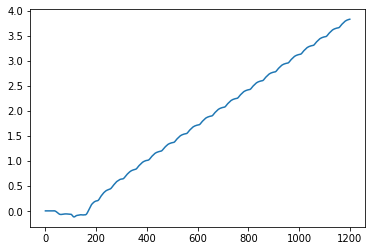

In [5]:
plt.figure()
plt.plot(posx)